<a href="https://colab.research.google.com/github/15021996/Startup-Funding-Prediction/blob/main/Soumya_Startup_Funding_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# General Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(rc={'figure.figsize':(10,6)})
import warnings
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

In [3]:
# importing data in a readable format
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/CohortAravali/Cohort Aravali/Module 4/Week 4/data_driven_investment_1.csv')

In [4]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


In [5]:
df = pd.DataFrame.drop_duplicates(df)

In [6]:
df_copy = df.copy()

In [7]:
df_copy.groupby('UUID',)

In [8]:
df.shape

(1412763, 20)

In [9]:
df.isnull().sum().sort_values(ascending =False)

Total Funding (USD)     1410605
City                    1410466
Latest Funded Date      1410459
Business Models         1410459
Practice Areas          1410459
Overview                1410459
Founded Year            1410459
Feed Name               1410459
Company Stage           1410459
MAU                     1294676
Uninstall_Rate          1060560
Total_Session_Time       535098
Open_Rate                535048
Avg_Session_Time         535031
Reach                    451300
UUID                        969
Region                        0
Application Category          0
month                         0
funding_ind                   0
dtype: int64

In [10]:
# checking for null values in the dataset
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
UUID,969,0.068589
month,0,0.000000
Application Category,0,0.000000
Avg_Session_Time,535031,37.871249
Business Models,1410459,99.836915
City,1410466,99.837411
Company Stage,1410459,99.836915
Feed Name,1410459,99.836915
Founded Year,1410459,99.836915
Latest Funded Date,1410459,99.836915


In [11]:
len(df['Application Category'].value_counts())

48

In [12]:
df.UUID.value_counts()

4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27    2654
a8febb4b767f83022235f3f34a2241ed1e13db2f    1670
061d769832ed6fa2e6f5f7923348f7f074e6aa91    1529
ec1cd22193eda5ec91905247ea3079ae84e2dd30    1224
03fb932e41ef68f1df45e0b20f326de05ebd438c    1086
                                            ... 
8835abee997142c503f18363fe98c1bbcbb888cd       1
fe9aafffedc0c0e09f5bc7a6cf27a8ba6debba6c       1
9b39a730b245f6152df0867fb354f6b1e1ccf64b       1
05acb65ccd363699b30ba7a01fe53f70ac38bb9c       1
9cfa55af2aa491a055fc1aa8452cf501da9e32fd       1
Name: UUID, Length: 147741, dtype: int64

In [13]:
df.Avg_Session_Time.value_counts()

0.010083    13
0.013100    13
0.015633    12
0.007217    12
0.005583    12
            ..
1.662669     1
0.186156     1
0.411762     1
0.507527     1
3.197290     1
Name: Avg_Session_Time, Length: 830645, dtype: int64

In [14]:
df['Business Models'].value_counts()

Social Platforms > Interest Based > Education > Higher Education > Q&A Platforms\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced                                               195
Food & Beverage Products > Beverages > Juices and Dilutables > Juices > Cold-pressed                                                                                                                113
K-12 EdTech > B2C Learning Solutions > School Curriculum > Multi Subject > Horizontal\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced\nY Combinator Batches > 2020 > Winter    113
Influencer E-Commerce > Live Video\nVideo Commerce > Live Stream Commerce                                                                                                                           107
Religion Tech > Ecommerce > Products                                                                                                                                                                 99


In [15]:
df.City.value_counts()

Bangalore                   677
Gurgaon                     485
Delhi                       437
Mumbai                      352
Kingstown\nMumbai            96
Pune                         65
Noida                        35
Hyderabad                    28
San Mateo\nChennai           21
Chennai                      21
Ahmedabad                    16
Jaipur                        7
Kolkata                       7
Kota                          6
Dublin\nBangalore             6
Singapore\nGurgaon            5
Panaji                        3
Singapore\nBangalore          3
Bangalore\nMumbai             3
Coimbatore                    3
San Francisco\nBangalore      3
Hangzhou\nDelhi               3
Bhopal                        3
London                        3
Kochi                         2
Fremont\nMumbai               2
Chicago\nNoida                2
London\nNoida                 1
Kanpur                        1
Faridabad                     1
Name: City, dtype: int64

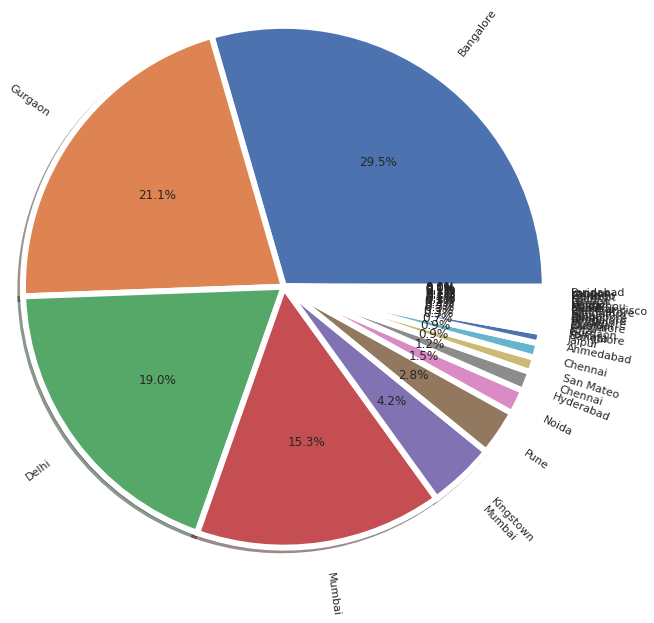

In [16]:
# font={'weight' : 'bold',
#         'size': 14}

# ###############################################################
# #                   Count plot with Hue                       #                                                             
# ###############################################################

# plt.figure(figsize=(20,20))
# ax=sns.countplot(df["City"].dropna(),hue=df["funding_ind"])
# plt.title("Continent of company",**font)
# plt.ylabel("count of companies")
# plt.yticks(rotation=30,**font)
# plt.xticks(**font)

# # create a list to collect the plt.patches data
# for i in ax.patches:
#     ax.text(i.get_x(),i.get_height(),str(round((i.get_height()), 2)), fontsize=16, color='Black',rotation=45)
    
# plt.show()
###############################################################
#                       pie plot                              #
###############################################################

df["City"].value_counts().astype(int).plot.pie(autopct="%.1f%%", shadow=True,rotatelabels=True,wedgeprops={'linewidth': 6},radius=2)
plt.show()

Maximum start-ups from Bangalore got funded.

## Looking at the Target Variable(We have imbalanced dataset)

In [17]:
df.funding_ind.value_counts()

0    1410459
1       2304
Name: funding_ind, dtype: int64

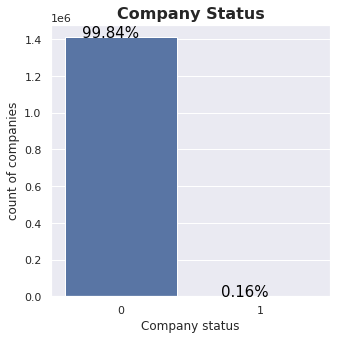

In [18]:
# checking the dependent variable --> `Company status`
plt.figure(figsize=(5,5))
ax=sns.countplot(df["funding_ind"])
plt.title("Company Status",{'fontsize':16,
        'fontweight':"bold"})

plt.ylabel("count of companies")
plt.xlabel("Company status")
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()+3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

## Exploring features

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

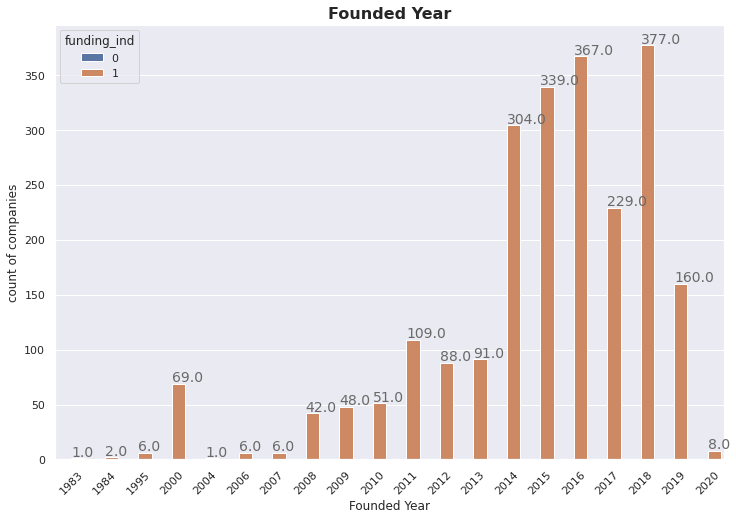

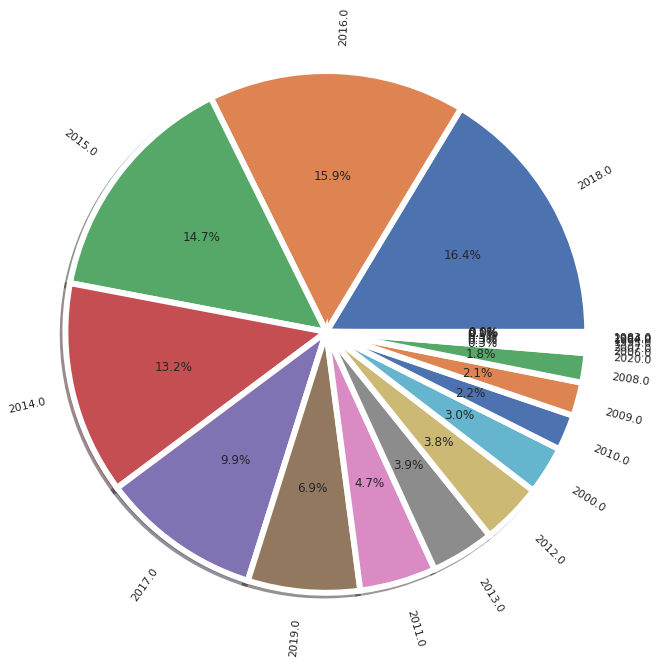

In [19]:
font={'weight' : 'bold','size': 16}
plt.figure(figsize=(12,8))
ax=sns.countplot(df["Founded Year"].dropna().astype(int),hue=df["funding_ind"])
plt.title("Founded Year",**font)
plt.ylabel("count of companies")
plt.xticks(rotation=45)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+2, \
            str(round((i.get_height()), 2)), fontsize=14, color='dimgrey')
plt.show()
(df["Founded Year"].value_counts()).plot.pie(autopct="%.1f%%",shadow=True,rotatelabels=True,wedgeprops={'linewidth': 6},radius=2)
plt.show()

<Figure size 576x576 with 0 Axes>

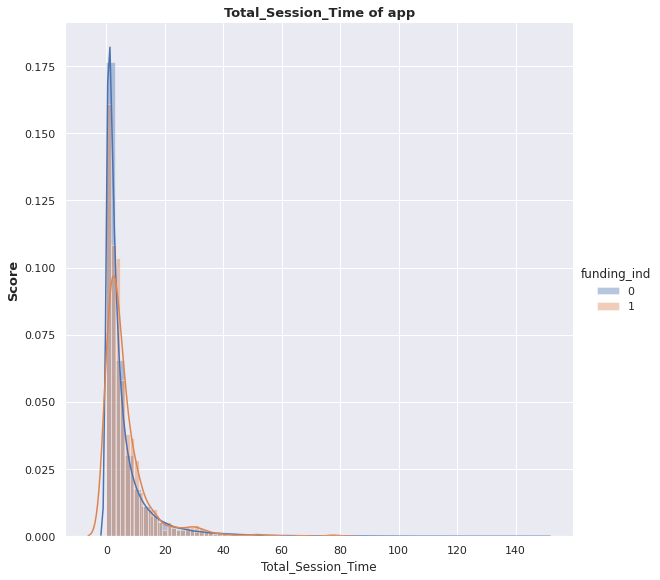

In [20]:
font={'weight' : 'bold',
        'size': 13}
plt.figure(figsize=(8,8))
###############################################################
#              distribution plot with hue                     #
###############################################################

sns.FacetGrid(df,hue='funding_ind',height=8)\
    .map(sns.distplot,'Total_Session_Time')\
    .add_legend()
plt.title("Total_Session_Time of app",**font)
plt.ylabel("Score",**font)
plt.show()

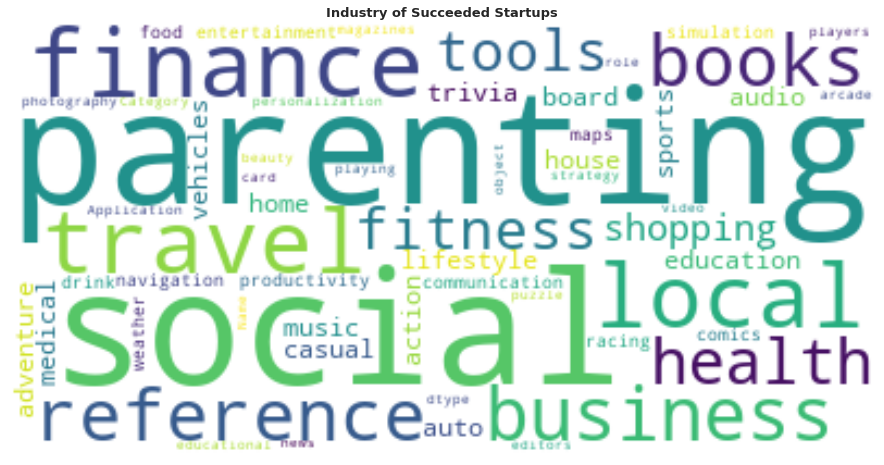

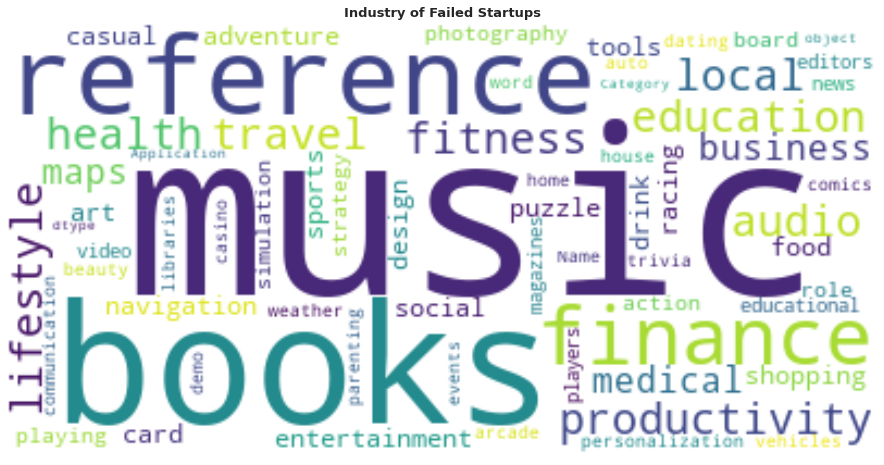

In [21]:
# industry of company which succeeded
success=df[df['funding_ind']==1]
text2 =success["Application Category"].replace({"'":" "}).str.lower().dropna().drop_duplicates()
plt.figure(figsize=(16,8))
# Create and generate a word cloud image:
wordcloud2 = WordCloud(background_color='white').generate(str(text2))
# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title("Industry of Succeeded Startups",**font)
plt.show()
# industry of company which failed
failed=df[df['funding_ind']==0]
text3 =failed["Application Category"].replace({"'":" "}).str.lower().dropna().drop_duplicates()
plt.figure(figsize=(16,8))
# Create and generate a word cloud image:
wordcloud3 = WordCloud(background_color='white').generate(str(text3))
# Display the generated image:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.title("Industry of Failed Startups",**font)
plt.axis("off")
plt.show()

## Analysing only the funded startups

In [22]:
df_funded = df[df['funding_ind'] == 1]

In [23]:
df_funded.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
147,0de5c3fb8362718a71754d77061259c809266dd1,20180801,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,National,4087427.0,NaN,0.250000,1
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180801,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,National,4473029.0,NaN,0.274336,1
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1
2624,9d17e60de4c6bb504d258872b6cc0bffd09de171,20180801,Travel & Local,NaN,Online Travel > Transportation > Train > Onlin...,Bangalore,Seed,Online Travel,2014.0,2018-11-01,NaN,NaN,Online platform to book train tickets in India,Consumer\nTravel and Hospitality Tech,0.995227,National,1156045.0,NaN,NaN,1
3374,7c3e0d6bec30478fb1e04249ac2e13016cf9c8db,20180801,Business,NaN,HRTech > HRMS > Suite > Enterprise\nCross Bord...,Gurgaon,Seed,HRTech\nCross Border - India,1995.0,2018-10-01,NaN,NaN,SaaS based Human Resource Management,Enterprise Applications\nGeo - India Tech,0.000161,National,34444.0,NaN,0.100000,1


In [24]:
# checking for null values in the dataset
null=pd.DataFrame(df_funded.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df_funded.isna().sum()/len(df)*100)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
UUID,0,0.000000
month,0,0.000000
Application Category,0,0.000000
Avg_Session_Time,738,0.052238
Business Models,0,0.000000
City,7,0.000495
Company Stage,0,0.000000
Feed Name,0,0.000000
Founded Year,0,0.000000
Latest Funded Date,0,0.000000


In [40]:
df_funded['City']=df_funded['City'].replace({'Kingstown\nMumbai': 'Mumbai', 'Fremont\nMumbai': 'Mumbai', 'San Mateo\nChennai': 'Chennai', 'Dublin\nBangalore': 'Bangalore','Singapore\nBangalore': 'Bangalore','San Francisco\nBangalore': 'Bangalore','Singapore\nGurgaon': 'Gurgaon','Hangzhou\nDelhi': 'Delhi','Chicago\nNoida': 'Noida','London\nNoida': 'Noida'})

In [41]:
df_funded.City.value_counts()

Series([], Name: City, dtype: int64)

In [42]:
df_funded.nlargest(5, ['Total Funding (USD)']) 

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
586621,25d602cbb8fe3b2be3abbc38056c7c8ba2e5483f,20200601,Shopping,2.306675,Horizontal E-Commerce > Marketplace,None,Acquired,Horizontal E-Commerce,2007.0,2020-09-16,0.725223,4.501723,Online marketplace offering multi-category pro...,Retail\nCovid-19,0.422252,National,7.201430e+09,10.361766,0.023394,1
586622,25d602cbb8fe3b2be3abbc38056c7c8ba2e5483f,20200601,Business,0.788551,Horizontal E-Commerce > Marketplace,None,Acquired,Horizontal E-Commerce,2007.0,2020-09-16,0.562418,9.968127,Online marketplace offering multi-category pro...,Retail\nCovid-19,0.001076,National,7.201430e+09,7.637852,0.108967,1
593461,cda9435bb7af9ee517fe018080d7f081a36c9397,20200601,Social,4.959111,Horizontal E-Commerce > Marketplace,None,Acquired,Horizontal E-Commerce,2007.0,2020-09-16,0.517502,5.633894,Online marketplace offering multi-category pro...,Retail\nCovid-19,0.001452,National,7.201430e+09,27.556655,0.228422,1
24149,419df2c466071859c528020b57899e7c9987a438,20190601,Shopping,NaN,Horizontal E-Commerce > Marketplace,None,Series H,Horizontal E-Commerce,2010.0,2019-07-23,NaN,NaN,Online marketplace for multi-category products,Retail\nCovid-19,0.109756,National,1.773395e+09,NaN,0.155464,1
24150,419df2c466071859c528020b57899e7c9987a438,20190601,Business,NaN,Horizontal E-Commerce > Marketplace,None,Series H,Horizontal E-Commerce,2010.0,2019-07-23,NaN,NaN,Online marketplace for multi-category products,Retail\nCovid-19,0.000366,National,1.773395e+09,NaN,0.064057,1
